In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [114]:
data = pd.read_csv("cs_bisnode_panel.csv")

In [115]:
data.shape

(287829, 48)

In [116]:
data.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.0,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,NaN,1229.629639,218.518524,0.0,4355.555664,2911.111084,38222.222656,NaN,NaN,22222.222656,62.962963,62751.851562,881.481506,1388.888916,1229.629639,NaN,NaN,0,364,0,2005,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1001034.0,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,NaN,725.925903,996.296326,0.0,7225.925781,5896.296387,38140.742188,NaN,NaN,23844.445312,755.555542,64625.925781,1637.036987,1388.888916,725.925903,NaN,NaN,0,364,0,2006,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1001034.0,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,NaN,1322.222168,570.370361,0.0,7951.852051,177.777771,40174.074219,NaN,NaN,22262.962891,0.000000,65100.000000,1633.333374,1388.888916,1322.222168,NaN,NaN,0,364,0,2007,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1001034.0,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,NaN,1022.222229,714.814819,0.0,5233.333496,1392.592651,54274.074219,NaN,NaN,21107.408203,0.000000,78085.187500,1725.925903,1481.481445,1022.222229,NaN,NaN,0,365,0,2008,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1001034.0,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,NaN,814.814819,-11044.444336,0.0,3259.259277,11.111111,41755.554688,NaN,NaN,13237.037109,-11074.074219,45388.890625,-9348.148438,1481.481445,814.814819,NaN,NaN,0,364,0,2009,1990.0,NaN,2.0,0.0,0.5,1968.0,5686.5,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333


In [117]:
data = data[(data["year"]>2009) & (data["year"]<2011)]

C:\Users\Emil\AppData\Local\Temp\ipykernel_13600\4026944557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlOrBr")


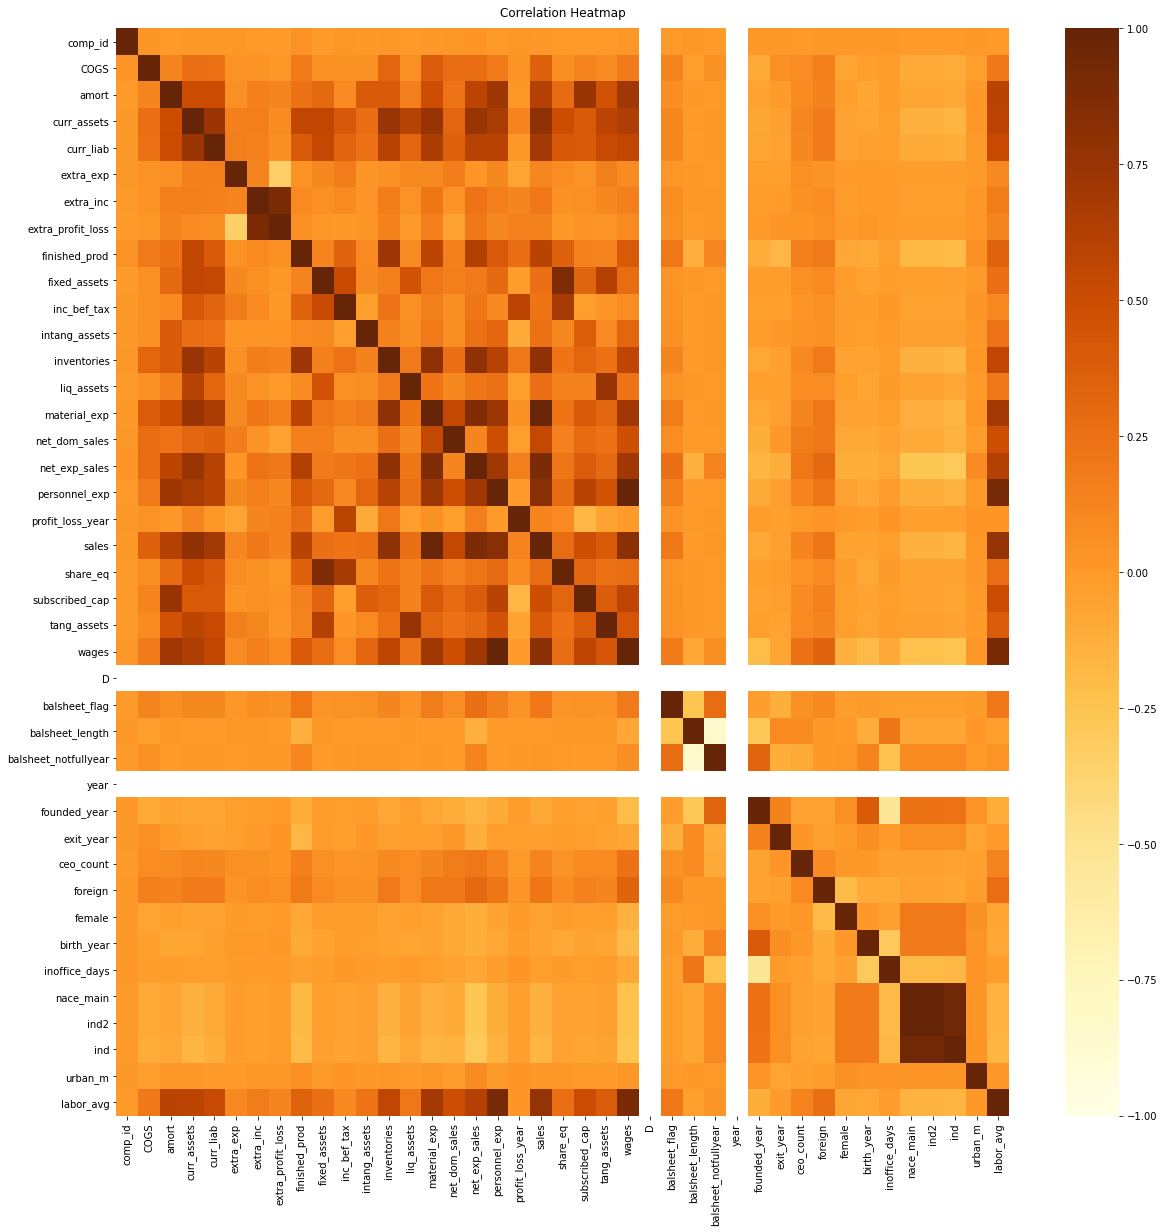

In [118]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="YlOrBr")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [119]:
missings = data.isna().sum(axis=0).sort_values(ascending=False)
cols_to_drop = missings[missings > len(data)*0.35].index.tolist()
data.drop(columns=cols_to_drop, inplace=True)

In [120]:
(data.isna().sum(axis=0)*100/(data.shape[0])).sort_values(ascending=False)

labor_avg               28.621565
founded_year            17.140830
foreign                 17.140830
female                  17.140830
inoffice_days           17.140830
gender                  17.140830
origin                  17.140830
ceo_count               17.140830
material_exp             3.957587
personnel_exp            3.957587
amort                    3.957587
extra_profit_loss        3.673835
extra_inc                3.673835
extra_exp                3.673835
sales                    3.670102
inc_bef_tax              3.670102
ind                      3.061529
region_m                 0.283751
nace_main                0.063471
ind2                     0.063471
subscribed_cap           0.018668
inventories              0.018668
curr_liab                0.018668
tang_assets              0.018668
share_eq                 0.018668
profit_loss_year         0.018668
liq_assets               0.018668
curr_assets              0.018668
intang_assets            0.018668
fixed_assets  

In [121]:
data=data.drop("labor_avg", axis=1);

In [122]:
median_female = data['female'].median()
data['female'] = data['female'].fillna(median_female)

In [123]:
data['female_flag'] = np.where(data['female'] == median_female, 1, 0)

In [124]:
data=data.drop(["tang_assets", "subscribed_cap", "share_eq", "material_exp", "extra_inc", "inventories", "ind", "ind2"], axis=1);

In [125]:
(data.isna().sum(axis=0)*100/(data.shape[0])).sort_values(ascending=False)

gender                  17.140830
foreign                 17.140830
ceo_count               17.140830
founded_year            17.140830
origin                  17.140830
inoffice_days           17.140830
amort                    3.957587
personnel_exp            3.957587
extra_exp                3.673835
extra_profit_loss        3.673835
sales                    3.670102
inc_bef_tax              3.670102
region_m                 0.283751
nace_main                0.063471
liq_assets               0.018668
profit_loss_year         0.018668
intang_assets            0.018668
fixed_assets             0.018668
curr_liab                0.018668
curr_assets              0.018668
founded_date             0.003734
urban_m                  0.000000
comp_id                  0.000000
balsheet_flag            0.000000
female                   0.000000
year                     0.000000
balsheet_notfullyear     0.000000
balsheet_length          0.000000
begin                    0.000000
end           

In [126]:
data.head(40)

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,liq_assets,personnel_exp,profit_loss_year,sales,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,ceo_count,foreign,female,inoffice_days,gender,origin,nace_main,urban_m,region_m,founded_date,female_flag
5,1001034.0,2010-01-01,2010-12-31,177.777771,2.096296e+03,1.962963e+04,0.000000,0.000000,6.370370e+02,-7548.147949,0.000000,192.592590,5.081481e+03,-7548.147949,9.929630e+03,0,364,0,2010,1990.0,2.0,0.0,0.500000,5686.5,mix,Domestic,5630.0,1,Central,1990-11-19,0
12,1001541.0,2010-01-01,2010-12-31,0.000000,1.740741e+03,8.444445e+02,0.000000,0.000000,0.000000e+00,-214.814819,0.000000,1285.185181,0.000000e+00,-214.814819,0.000000e+00,0,364,0,2010,2008.0,1.0,0.0,0.000000,3222.0,male,Domestic,5610.0,3,Central,2008-02-24,1
21,1002029.0,2010-01-01,2010-12-31,22114.814453,2.307815e+05,2.025519e+05,0.000000,0.000000,4.561111e+04,36129.628906,0.000000,17788.888672,3.788889e+04,32559.259766,8.437741e+05,0,364,0,2010,2006.0,2.0,0.0,0.000000,3101.0,male,Domestic,2711.0,3,East,2006-07-03,1
33,1003200.0,2010-01-01,2010-12-31,74.074074,9.222222e+02,5.388889e+03,0.000000,0.000000,9.481481e+02,285.185181,0.000000,118.518517,1.577778e+03,285.185181,1.379259e+04,0,364,0,2010,2003.0,2.0,0.0,1.000000,1754.0,female,Domestic,5630.0,1,Central,2003-10-21,0
41,1004012.0,2010-01-01,2010-12-31,0.000000,2.670370e+03,1.066667e+03,0.000000,0.000000,0.000000e+00,292.592590,0.000000,651.851868,1.744444e+03,251.851852,2.533333e+03,0,364,0,2010,1991.0,1.0,0.0,0.000000,7722.0,male,Domestic,3314.0,3,West,1991-11-24,1
46,1007261.0,2010-09-08,2010-12-31,0.000000,2.459259e+03,1.348148e+03,0.000000,0.000000,0.000000e+00,-740.740723,0.000000,607.407410,2.200000e+03,-740.740723,2.188889e+03,0,114,1,2010,2010.0,1.0,0.0,0.000000,1539.0,male,Domestic,5610.0,1,Central,2010-08-26,1
54,1011889.0,2010-01-01,2010-12-31,27514.814453,1.054333e+05,6.611111e+03,0.000000,0.000000,8.134148e+05,44962.964844,0.000000,85088.890625,8.012963e+04,44962.964844,3.414592e+05,0,364,0,2010,1992.0,1.0,0.0,0.000000,6198.0,male,Domestic,5510.0,2,West,1992-11-09,1
66,1014183.0,2010-01-01,2010-12-31,10281.481445,1.495037e+05,3.622222e+03,0.000000,0.000000,1.316407e+05,4122.222168,0.000000,3151.851807,4.142222e+04,3074.073975,1.073815e+05,0,364,0,2010,2001.0,2.0,0.0,0.500000,3613.5,mix,Domestic,5510.0,2,Central,2001-12-21,0
78,1018301.0,2010-01-01,2010-12-31,0.000000,1.696296e+03,4.236667e+04,0.000000,0.000000,5.215555e+04,107.407410,122.222221,1451.851807,5.407407e+02,92.592590,5.074074e+03,0,364,0,2010,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,5630.0,2,Central,2004-06-29,1
89,1022796.0,2010-01-01,2010-12-31,1537.036987,8.192593e+03,1.577778e+03,0.000000,0.000000,6.577778e+03,-9529.629883,0.000000,4492.592773,7.366667e+03,-9603.704102,2.915555e+04,0,364,0,2010,2001.0,1.0,0.0,0.000000,5201.0,male,Domestic,5630.0,1,Central,2001-02-01,1


In [127]:
data['begin'] = data['begin'].str.slice(stop=4)

In [128]:
data['end'] = data['end'].str.slice(stop=4)
data['founded_date'] = data['founded_date'].str.slice(stop=4)

In [129]:
data['founded_date'] = data['founded_date'].fillna("1500")

In [130]:
data['begin'] = data['begin'].astype(int)
data['end'] = data['end'].astype(int)
data['founded_date'] = data['founded_date'].astype(int)

In [131]:
data=data.drop(["begin", "end", "founded_year"], axis=1);

In [132]:
data['age'] = data['year']-data['founded_date']

In [133]:
data[data['year']<data['founded_date']]

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,liq_assets,personnel_exp,profit_loss_year,sales,balsheet_flag,balsheet_length,balsheet_notfullyear,year,ceo_count,foreign,female,inoffice_days,gender,origin,nace_main,urban_m,region_m,founded_date,female_flag,age
1644,1.684924e+07,NaN,1.408278e+06,873285.187500,0.0,66.666664,567481.500000,49881.480469,29.629629,252437.031250,NaN,36462.964844,3.994341e+06,0,364,0,2010,NaN,NaN,0.0,NaN,NaN,NaN,2825.0,3,Central,2011,1,-1
1936,2.272124e+07,NaN,1.851852e+03,0.000000,NaN,NaN,0.000000,NaN,0.000000,1851.851807,NaN,0.000000,NaN,1,194,1,2010,NaN,NaN,0.0,NaN,NaN,NaN,5630.0,1,Central,2011,1,-1
2048,2.491946e+07,329.629639,6.221111e+04,58129.628906,0.0,0.000000,300.000000,1059.259277,0.000000,781.481506,0.000000,907.407410,2.421222e+05,0,364,0,2010,NaN,NaN,0.0,NaN,NaN,NaN,5610.0,2,East,2013,1,-3
2572,3.714940e+07,NaN,1.851852e+03,0.000000,NaN,NaN,0.000000,NaN,0.000000,1851.851807,NaN,0.000000,NaN,1,337,1,2010,NaN,NaN,0.0,NaN,NaN,NaN,5610.0,1,Central,2011,1,-1
3426,6.562317e+07,NaN,1.851852e+03,0.000000,NaN,NaN,0.000000,NaN,0.000000,1851.851807,NaN,0.000000,NaN,1,33,1,2010,NaN,NaN,0.0,NaN,NaN,NaN,5610.0,1,Central,2011,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281684,4.443139e+11,0.000000,6.658519e+04,22051.851562,0.0,0.000000,0.000000,21214.814453,0.000000,34362.964844,6051.852051,18144.445312,1.401852e+05,0,364,0,2010,NaN,NaN,0.0,NaN,NaN,NaN,2670.0,1,Central,2011,1,-1
283442,4.500513e+11,103.703697,2.521111e+04,5274.074219,0.0,0.000000,537.037048,-2377.777832,0.000000,6685.185059,1429.629639,-2451.851807,3.538889e+04,0,364,0,2010,NaN,NaN,0.0,NaN,NaN,NaN,2849.0,2,Central,2013,1,-3
285541,4.567761e+11,27729.628906,1.267926e+05,115511.109375,0.0,3962.962891,322251.843750,8214.814453,281877.781250,19003.703125,177244.437500,8055.555664,3.095852e+05,0,364,0,2010,NaN,NaN,0.0,NaN,NaN,NaN,2931.0,1,Central,2013,1,-3
286080,4.585255e+11,3848.148193,2.025926e+04,37525.925781,0.0,0.000000,85759.257812,251.851852,0.000000,3707.407471,20418.517578,77.777779,1.133481e+05,0,364,0,2010,NaN,NaN,0.0,NaN,NaN,NaN,5610.0,3,East,2013,1,-3


In [137]:
data['region_m'] = data['region_m'].fillna("None")

In [140]:
dummies = pd.get_dummies(data['region_m'], prefix='region')
data = pd.concat([data, dummies], axis=1)

In [143]:
data=data.drop(["region_m"], axis=1)

In [144]:
data.head()

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,liq_assets,personnel_exp,profit_loss_year,sales,balsheet_flag,balsheet_length,balsheet_notfullyear,year,ceo_count,foreign,female,inoffice_days,gender,origin,nace_main,urban_m,founded_date,female_flag,age,region_Central,region_East,region_None,region_West
5,1001034.0,177.777771,2096.296387,19629.628906,0.0,0.0,637.037048,-7548.147949,0.0,192.592590,5081.481445,-7548.147949,9929.629883,0,364,0,2010,2.0,0.0,0.5,5686.5,mix,Domestic,5630.0,1,1990,0,20,1,0,0,0
12,1001541.0,0.000000,1740.740723,844.444458,0.0,0.0,0.000000,-214.814819,0.0,1285.185181,0.000000,-214.814819,0.000000,0,364,0,2010,1.0,0.0,0.0,3222.0,male,Domestic,5610.0,3,2008,1,2,1,0,0,0
21,1002029.0,22114.814453,230781.484375,202551.859375,0.0,0.0,45611.109375,36129.628906,0.0,17788.888672,37888.890625,32559.259766,843774.062500,0,364,0,2010,2.0,0.0,0.0,3101.0,male,Domestic,2711.0,3,2006,1,4,0,1,0,0
33,1003200.0,74.074074,922.222229,5388.888672,0.0,0.0,948.148132,285.185181,0.0,118.518517,1577.777832,285.185181,13792.592773,0,364,0,2010,2.0,0.0,1.0,1754.0,female,Domestic,5630.0,1,2003,0,7,1,0,0,0
41,1004012.0,0.000000,2670.370361,1066.666626,0.0,0.0,0.000000,292.592590,0.0,651.851868,1744.444458,251.851852,2533.333252,0,364,0,2010,1.0,0.0,0.0,7722.0,male,Domestic,3314.0,3,1991,1,19,0,0,0,1


In [145]:
data['asset_flag'] = np.where(data['liq_assets'] == np.nan, 1, 0)
data['asset_flag'] = np.where(data['profit_loss_year'] == np.nan, 1, 0)
data['asset_flag'] = np.where(data['intang_assets'] == np.nan, 1, 0)
data['asset_flag'] = np.where(data['fixed_assets'] == np.nan, 1, 0)
data['asset_flag'] = np.where(data['curr_liab'] == np.nan, 1, 0)
data['asset_flag'] = np.where(data['curr_assets'] == np.nan, 1, 0)

In [146]:
data['liq_assets'] = data['liq_assets'].fillna(0)
data['profit_loss_year'] = data['profit_loss_year'].fillna(0)
data['intang_assets'] = data['intang_assets'].fillna(0)
data['fixed_assets'] = data['fixed_assets'].fillna(0)
data['curr_liab'] = data['curr_liab'].fillna(0)
data['curr_assets'] = data['curr_assets'].fillna(0)

In [149]:
data['nace_flag'] = np.where(data['nace_main'] == np.nan, 1, 0)
data['nace_main'] = data['nace_main'].fillna(0)

In [153]:
data['inc_bef_tax_flag'] = np.where(data['inc_bef_tax'] == np.nan, 1, 0)
data['inc_bef_tax'] = data['inc_bef_tax'].fillna(0)
data['sales_flag'] = np.where(data['sales'] == np.nan, 1, 0)
data['sales'] = data['sales'].fillna(0)

In [155]:
data['extra_flag'] = np.where(data['extra_profit_loss'] == np.nan, 1, 0)
data['extra_flag'] = np.where(data['extra_exp'] == np.nan, 1, 0)
data['extra_profit_loss'] = data['extra_profit_loss'].fillna(0)
data['extra_exp'] = data['extra_exp'].fillna(0)

In [159]:
data['amort_person_exp_flag'] = np.where(data['amort'] == np.nan, 1, 0)
data['amort_person_exp_flag'] = np.where(data['personnel_exp'] == np.nan, 1, 0)
data['amort'] = data['amort'].fillna(0)
data['personnel_exp'] = data['personnel_exp'].fillna(0)

In [164]:
data['gender_inof_fore_ceo_co_orig_flag'] = np.where(data['gender'] == np.nan, 1, 0)
data['gender_inof_fore_ceo_co_orig_flag'] = np.where(data['inoffice_days'] == np.nan, 1, 0)
data['gender_inof_fore_ceo_co_orig_flag'] = np.where(data['foreign'] == np.nan, 1, 0)
data['gender_inof_fore_ceo_co_orig_flag'] = np.where(data['ceo_count'] == np.nan, 1, 0)
data['gender_inof_fore_ceo_co_orig_flag'] = np.where(data['origin'] == np.nan, 1, 0)

data['gender'] = data['gender'].fillna(0)
data['inoffice_days'] = data['inoffice_days'].fillna(0)
data['foreign'] = data['foreign'].fillna(0)
data['ceo_count'] = data['ceo_count'].fillna(0)
data['origin'] = data['origin'].fillna(0)


In [166]:
(data.isna().sum(axis=0)*100/(data.shape[0])).sort_values(ascending=False)

comp_id                              0.0
region_East                          0.0
origin                               0.0
nace_main                            0.0
urban_m                              0.0
founded_date                         0.0
female_flag                          0.0
age                                  0.0
region_Central                       0.0
region_None                          0.0
inoffice_days                        0.0
region_West                          0.0
asset_flag                           0.0
nace_flag                            0.0
inc_bef_tax_flag                     0.0
sales_flag                           0.0
extra_flag                           0.0
amort_person_exp_flag                0.0
gender                               0.0
female                               0.0
amort                                0.0
liq_assets                           0.0
curr_assets                          0.0
curr_liab                            0.0
extra_exp       

In [171]:
dummy = pd.get_dummies(data['gender'], prefix="gender")
data = pd.concat([data, dummy], axis=1)

In [173]:
data=data.drop(["gender_0", "region_None"], axis=1)

In [176]:
dummy = pd.get_dummies(data['origin'], prefix="origin")
data = pd.concat([data, dummy], axis=1)
data=data.drop(["origin_0"], axis=1)

In [181]:
dummy = pd.get_dummies(data['urban_m'], prefix="urban", drop_first=True)
data = pd.concat([data, dummy], axis=1)

In [82]:
data["status_alive"] = (data["sales"] > 0 & (False == data["sales"].isna())).astype(int)

In [187]:
data=data.drop(["gender", "origin", "urban_m"], axis=1)

In [190]:
data.head()

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,liq_assets,personnel_exp,profit_loss_year,sales,balsheet_flag,balsheet_length,balsheet_notfullyear,year,ceo_count,foreign,female,inoffice_days,nace_main,founded_date,female_flag,age,region_Central,region_East,region_West,asset_flag,nace_flag,inc_bef_tax_flag,sales_flag,extra_flag,amort_person_exp_flag,gender_inof_fore_ceo_co_orig_flag,gender_female,gender_male,gender_mix,origin_Domestic,origin_Foreign,origin_mix,urban_2,urban_3
5,1001034.0,177.777771,2096.296387,19629.628906,0.0,0.0,637.037048,-7548.147949,0.0,192.592590,5081.481445,-7548.147949,9929.629883,0,364,0,2010,2.0,0.0,0.5,5686.5,5630.0,1990,0,20,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
12,1001541.0,0.000000,1740.740723,844.444458,0.0,0.0,0.000000,-214.814819,0.0,1285.185181,0.000000,-214.814819,0.000000,0,364,0,2010,1.0,0.0,0.0,3222.0,5610.0,2008,1,2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
21,1002029.0,22114.814453,230781.484375,202551.859375,0.0,0.0,45611.109375,36129.628906,0.0,17788.888672,37888.890625,32559.259766,843774.062500,0,364,0,2010,2.0,0.0,0.0,3101.0,2711.0,2006,1,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
33,1003200.0,74.074074,922.222229,5388.888672,0.0,0.0,948.148132,285.185181,0.0,118.518517,1577.777832,285.185181,13792.592773,0,364,0,2010,2.0,0.0,1.0,1754.0,5630.0,2003,0,7,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
41,1004012.0,0.000000,2670.370361,1066.666626,0.0,0.0,0.000000,292.592590,0.0,651.851868,1744.444458,251.851852,2533.333252,0,364,0,2010,1.0,0.0,0.0,7722.0,3314.0,1991,1,19,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
